# Decision Tree Classification from SK Learn over Breast Cancer Data(Bi-Class Classification)
Decision Tree algorithms are used for both predictions as well as classification in machine learning. Using the decision tree with a given set of inputs, one can map the various outcomes that are a result of the consequences or decisions.<br>
Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. In general, decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning.<br>
Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.<br>
The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.<br>
### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from matplotlib.colors import ListedColormap

### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [2]:
dataset = pd.read_csv('./Dataset/Breast Cancer/Breast_Cancer_Data.csv')
dataset["label"] = dataset.diagnosis
dataset.drop([dataset.columns[0], dataset.columns[1], dataset.columns[32]], axis = 1, inplace = True)
dataset.replace(['B','M'], [0,1] , inplace = True)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,-1].values

Splitting the dataset into the Training set and Test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Normalising the data
Scaling the features.<br>
The scaling is also know as standardisation/normalisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Decision Tree Classification to the Training set

In [5]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# ----------------------------------------------------------------------------------------------------------
### Prediction Function
Prediction function is use to predict the accuracy of the classifier model over the train data and test data.

In [6]:
def prediction(model,testing_data,testing_label):
    predict = model.predict(testing_data)
    accuracy = np.count_nonzero(np.equal(predict,testing_label))
    print("Accuracy : ",accuracy*100/testing_label.shape[0])
    return accuracy,predict

#### Testing our Model on the Training Data

In [7]:
train_accuracy,train_predict = prediction(classifier,X_train,y_train)

Accuracy :  100.0


#### Testing our Model on the Testing Data

In [8]:
test_accuracy,test_predict = prediction(classifier,X_test,y_test)

Accuracy :  86.7132867132867


# ----------------------------------------------------------------------------------------------------------
### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br>
##### Precision means how much accurately our model predicts or we can say how much positive idenfied label actually correct.<br>
$$Precision = \frac{True Positive}{True Positive + False Positive}$$
##### Recall means how much positive identified label predicted correctly.<br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$

In [9]:
def confusion_matrix_with_plot(model,testing_data,testing_label,predict_label):
    tn,fp,fn,tp = confusion_matrix(testing_label,predict_label).ravel()
    plot_confusion_matrix(model,testing_data,testing_label)
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    return print("True Positive : ",tp,"\nFalse Positive : ",fp,"\nTrue Negative : ",tn,"\nFalse Negative : ",fn,"\nPrecision : ",precision,"\nRecall : ",recall)

#### Ploting Confusion Matrix over Training Data

True Positive :  159 
False Positive :  0 
True Negative :  267 
False Negative :  0 
Precision :  100.0 
Recall :  100.0


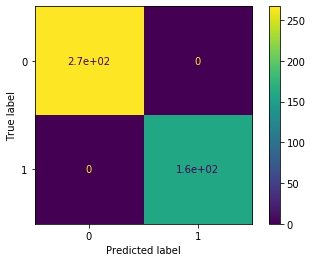

In [10]:
confusion_matrix_with_plot(classifier,X_train,y_train,train_predict)

Ploting Confusion Matrix over Testing Data

True Positive :  44 
False Positive :  10 
True Negative :  80 
False Negative :  9 
Precision :  81.48148148148148 
Recall :  83.01886792452831


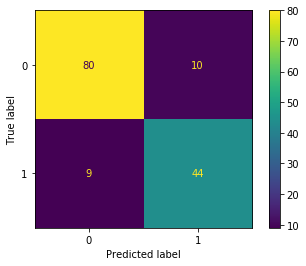

In [11]:
confusion_matrix_with_plot(classifier,X_test,y_test,test_predict)

# ----------------------------------------------------------------------------------------------------------
### Precision-Recall Curve
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

#### Precision-Recall Curve over training data

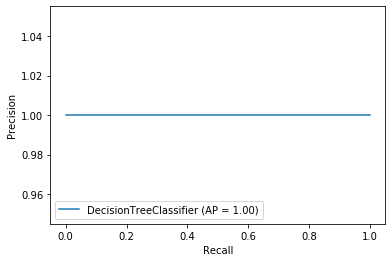

In [12]:
plot_precision_recall_curve(classifier,X_train,y_train)

#### Precision-Recall Curve over testing data

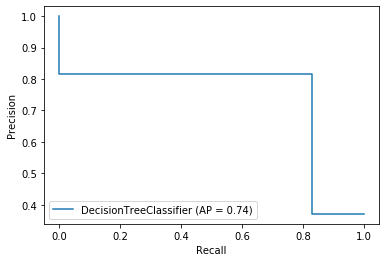

In [13]:
plot_precision_recall_curve(classifier,X_test,y_test)

### Plot ROC Curve Function
Preparing to plot ROC curve. The function plot the ROC Curve from the list containing the value of true positive and false positive rate. A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

#### Plotting ROC Curve for Training Data

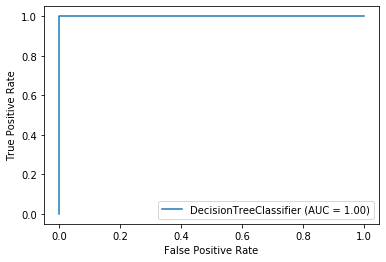

In [14]:
plot_roc_curve(classifier,X_train,y_train)

#### Plotting ROC Curve Testing Data

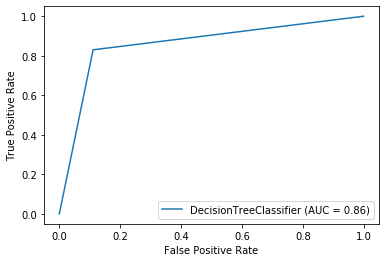

In [15]:
plot_roc_curve(classifier,X_test,y_test)

# -----------------------------------------------------------------------------------------------------------------------------------------
### Ploting Colormap

In [16]:
def plot_colormap(model,test_data,test_label):
    X_set, y_set = test_data, test_label
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Decision Tree Classification (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#### Ploting Colormap over Training Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


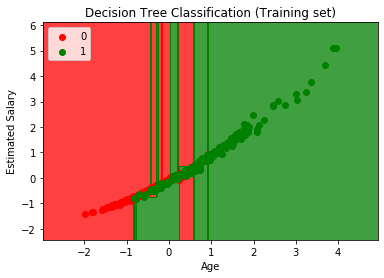

In [17]:
plot_colormap(classifier,X_train,y_train)

#### Ploting Colormap over Testing Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


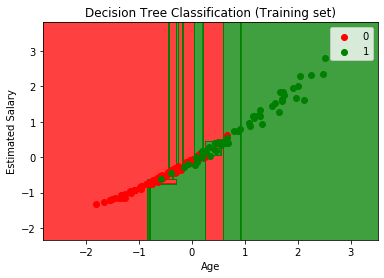

In [18]:
plot_colormap(classifier,X_test,y_test)